## Compute Sagnac Frequency - Prism Spectra

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import log10

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
config = {}

# config['seed'] = "BW.DROMY..FJZ"

## PRISM
# config['tbeg'] = UTCDateTime("2023-05-09 01:00")
# config['tend'] = UTCDateTime("2023-05-09 04:00")

config['datapath'] = data_path+"sagnac_frequency/prismspectra/"


## Load Data

In [4]:
before = read_pickle(config['datapath']+"psd_2023-05-01_RZ_before_prism.pkl")

## no signal for CW
# after = read_pickle(config['datapath']+"psd_2023-05-16_RZ_after_prism.pkl")
# after = read_pickle(config['datapath']+"psd_2023-05-20_RZ_after_prism.pkl")


## control loop still with oszilations
after = read_pickle(config['datapath']+"psd_2023-05-04_RZ_after_prism.pkl")
# after = read_pickle(config['datapath']+"psd_2023-05-14_RZ_after_prism.pkl")


## noise as RZ with PMT on but no interferogram
noise1 = read_pickle(config['datapath']+"psd_2023-05-28_RZ_selfnoise.pkl")

## self noise as recording of RW channel that is off
noise2 = read_pickle(config['datapath']+"psd_2023-05-04_RW_selfnoise.pkl")

In [5]:
before['fjz_psd_db'] = 20*log10(before.fjz_psd)
before['f1v_psd_db'] = 20*log10(before.f1v_psd)
before['f2v_psd_db'] = 20*log10(before.f2v_psd)

after['fjz_psd_db'] = 20*log10(after.fjz_psd)
after['f1v_psd_db'] = 20*log10(after.f1v_psd)
after['f2v_psd_db'] = 20*log10(after.f2v_psd)

noise1['fjz_psd_db'] = 20*log10(noise1.fjz_psd)

noise2['fjz_psd_db'] = 20*log10(noise2.fjz_psd)

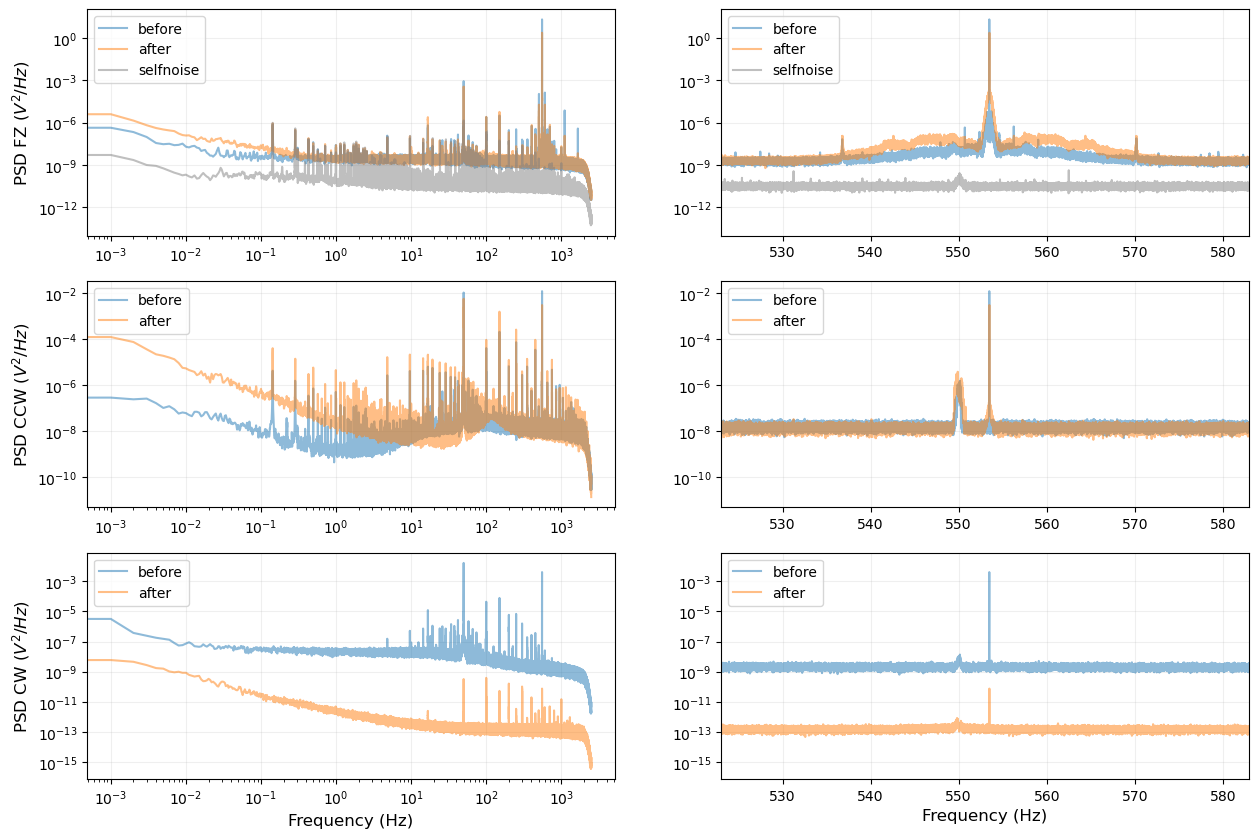

In [6]:
def __makeplot():

    font = 12

    fig, ax = plt.subplots(3,2,figsize=(15,10))

    ax[0,0].loglog(before.frequencies, before.fjz_psd, alpha=0.5, label="before")
    ax[0,0].loglog(before.frequencies, after.fjz_psd, alpha=0.5, label="after")
    ax[0,0].loglog(noise1.frequencies, noise1.fjz_psd, alpha=0.5, label="selfnoise", color="grey")

    ax[1,0].loglog(before.frequencies, before.f1v_psd, alpha=0.5, label="before")
    ax[1,0].loglog(before.frequencies, after.f1v_psd, alpha=0.5, label="after")

    ax[2,0].loglog(before.frequencies, before.f2v_psd, alpha=0.5, label="before")
    ax[2,0].loglog(before.frequencies, after.f2v_psd, alpha=0.5, label="after")

    ax[0,1].semilogy(before.frequencies, before.fjz_psd, alpha=0.5, label="before")
    ax[0,1].semilogy(before.frequencies, after.fjz_psd, alpha=0.5, label="after")
    ax[0,1].semilogy(noise1.frequencies, noise1.fjz_psd, alpha=0.5, label="selfnoise", color="grey")

    ax[1,1].semilogy(before.frequencies, before.f1v_psd, alpha=0.5, label="before")
    ax[1,1].semilogy(before.frequencies, after.f1v_psd, alpha=0.5, label="after")

    ax[2,1].semilogy(before.frequencies, before.f2v_psd, alpha=0.5, label="before")
    ax[2,1].semilogy(before.frequencies, after.f2v_psd, alpha=0.5, label="after")


    for i in range(3):
        ax[i,1].set_xlim(553-30, 553+30)
        ax[i,0].legend(loc=2)
        ax[i,1].legend(loc=2)
        ax[i,0].grid(zorder=-1, alpha=0.2)
        ax[i,1].grid(zorder=-1, alpha=0.2)
    #     ax[i].ticklabel_format(useOffset=False, style='plain')


    ax[0,0].set_ylabel("PSD FZ ($V^2 / Hz$)", fontsize=font)
    ax[1,0].set_ylabel("PSD CCW ($V^2 / Hz$)", fontsize=font)
    ax[2,0].set_ylabel("PSD CW ($V^2 / Hz$)", fontsize=font)

    ax[2,0].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[2,1].set_xlabel("Frequency (Hz)", fontsize=font)

    plt.show();
    
__makeplot()

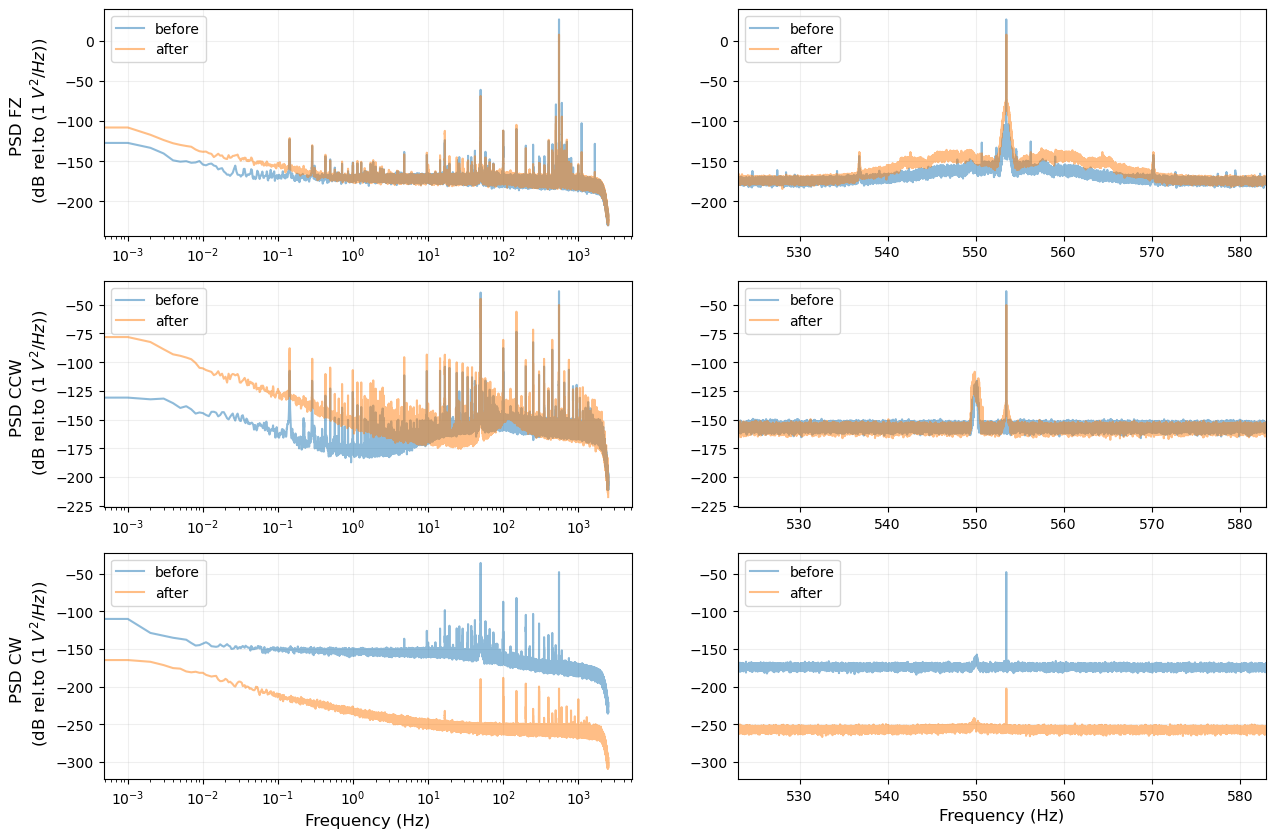

In [7]:
def __makeplot_DB():

    font = 12

    fig, ax = plt.subplots(3,2,figsize=(15,10))

    ax[0,0].semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, label="before")
    ax[0,0].semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, label="after")
#     ax[0,0].semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, label="selfnoise", color="grey")

    ax[1,0].semilogx(before.frequencies, before.f1v_psd_db, alpha=0.5, label="before")
    ax[1,0].semilogx(before.frequencies, after.f1v_psd_db, alpha=0.5, label="after")

    ax[2,0].semilogx(before.frequencies, before.f2v_psd_db, alpha=0.5, label="before")
    ax[2,0].semilogx(before.frequencies, after.f2v_psd_db, alpha=0.5, label="after")

    ax[0,1].plot(before.frequencies, before.fjz_psd_db, alpha=0.5, label="before")
    ax[0,1].plot(before.frequencies, after.fjz_psd_db, alpha=0.5, label="after")
#     ax[0,1].plot(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, label="selfnoise", color="grey")

    ax[1,1].plot(before.frequencies, before.f1v_psd_db, alpha=0.5, label="before")
    ax[1,1].plot(before.frequencies, after.f1v_psd_db, alpha=0.5, label="after")

    ax[2,1].plot(before.frequencies, before.f2v_psd_db, alpha=0.5, label="before")
    ax[2,1].plot(before.frequencies, after.f2v_psd_db, alpha=0.5, label="after")


    for i in range(3):
        ax[i,1].set_xlim(553-30, 553+30)
        ax[i,0].legend(loc=2)
        ax[i,1].legend(loc=2)
        ax[i,0].grid(zorder=-1, alpha=0.2)
        ax[i,1].grid(zorder=-1, alpha=0.2)

    #     ax[i].ticklabel_format(useOffset=False, style='plain')


    ax[0,0].set_ylabel(f"PSD FZ \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)
    ax[1,0].set_ylabel(f"PSD CCW \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)
    ax[2,0].set_ylabel(f"PSD CW \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)

    ax[2,0].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[2,1].set_xlabel("Frequency (Hz)", fontsize=font)

    plt.show();

__makeplot_DB()

## Compare with Noise

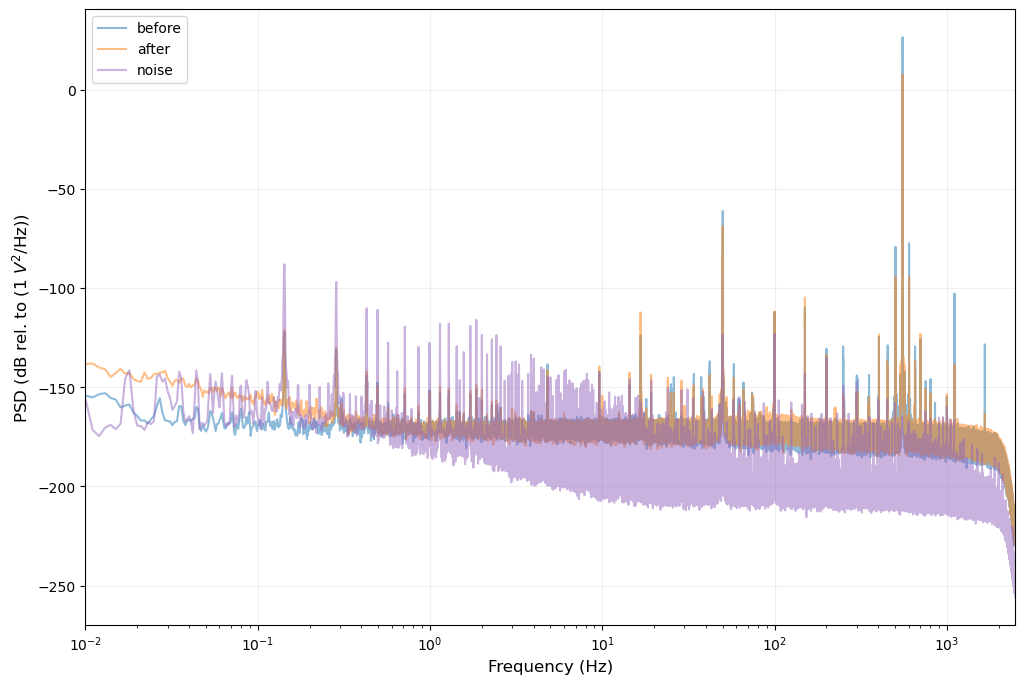

In [13]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")
ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")

# ax.semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")
ax.semilogx(noise2.frequencies, noise2.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

NameError: name 'noise' is not defined

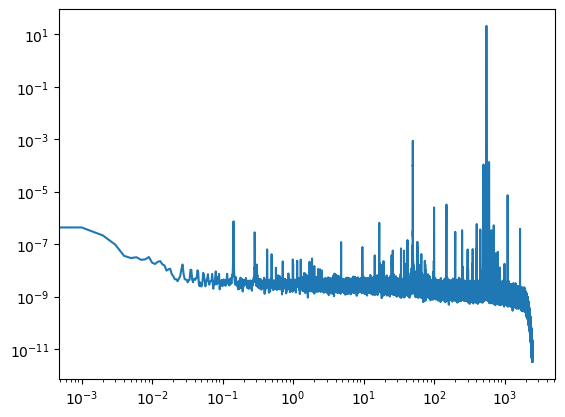

In [9]:
plt.loglog(before.frequencies, before.fjz_psd)
plt.loglog(before.frequencies, noise.fjz_psd)
# plt.loglog(before.frequencies, before.fjz_psd/max(before.fjz_psd))
# plt.loglog(before.frequencies, noise.fjz_psd/max(noise.fjz_psd))

plt.loglog(before.frequencies, before.fjz_psd/(noise.fjz_psd))
   
plt.xlim(10,700)

In [3]:
rv = read_pickle("/home/andbro/kilauea-data/psd_2023-05-09_RV_with_new_control.pkl")

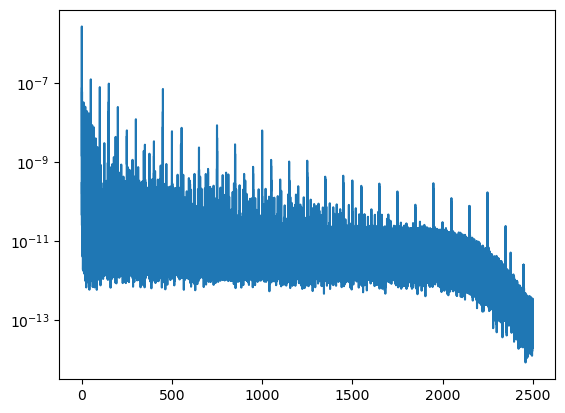

In [5]:
plt.semilogy(rv.frequencies, rv.fjz_psd)
# plt.xlim(430, 460)